## EDA on geotagged tweets
#### Build basics of extracting key words, sentiments about crowdedness. Label the tweets. Look at frequency of tweets over time. Pay attention to the time the tweet was posted but also when it was referring to. 

In [140]:
import pandas as pd
import numpy as np
import datetime as dt

In [141]:
df = pd.read_pickle("park_tweets.pkl")

In [142]:
df.head()

,date,text,day_of_week,hour
date,,,,
2020-01-01 03:00:04,2020-01-01 03:00:04,人还很少 #NYE2020 – at Prospect Park,Wednesday,3
2020-01-01 04:00:44,2020-01-01 04:00:44,Baby 出现了，家庭友好的新年庆祝 #NYE2020 #brooklyn #NYC – a...,Wednesday,4
2020-01-01 04:39:12,2020-01-01 04:39:12,Flirty Leo & Aquarius – at Grand Army Plaza Gr...,Wednesday,4
2020-01-01 04:51:00,2020-01-01 04:51:00,"""New Year in Space"" Illo for the Washington Po...",Wednesday,4
2020-01-01 04:52:13,2020-01-01 04:52:13,"""New Year Countdown"" Illo for NEW YORK PRESS D...",Wednesday,4


In [143]:
daily_counts = df.text.resample('d').count()

In [144]:
daily_counts.head()

date
2020-01-01    18
2020-01-02     8
2020-01-03     4
2020-01-04    13
2020-01-05    13
Freq: D, Name: text, dtype: int64

In [145]:
today = dt.datetime.now().strftime("%Y-%m-%d")
ticks = pd.date_range(start="2020-01-01",end=today, freq = 'W')

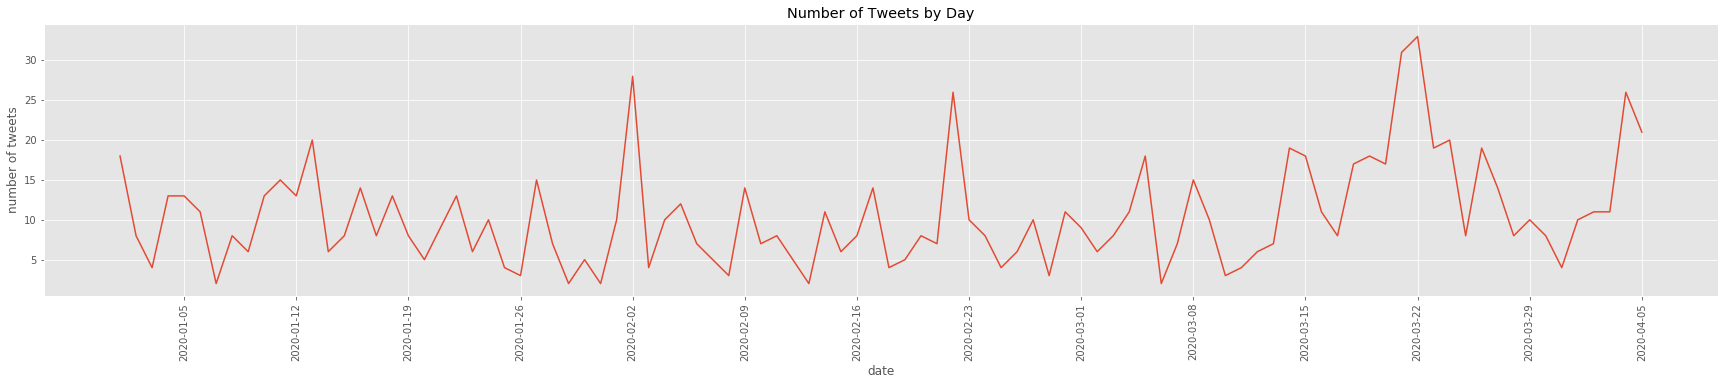

In [146]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure(figsize=(30,5))
plt.plot(daily_counts)
plt.xticks(ticks=ticks,rotation=90)
plt.title("Number of Tweets by Day")
plt.xlabel("date")
plt.ylabel("number of tweets")
plt.savefig("tweetcount.png", dpi=300, bbox_inches='tight')
plt.show()

In [147]:
crisis_startdate = pd.to_datetime("2020-03-23")
len(df[df.date >= crisis_startdate])

189

In [148]:
df_corona = df[df.date >= crisis_startdate]

In [149]:
df_corona.to_pickle("./df_corona.pkl")

In [150]:
for i in range(160,188):
    print(i, ':', df_corona.iloc[i].date, ':', df_corona.iloc[i].text)

160 : 2020-04-04 22:24:48 : Sad to miss running citifield today. @SpartanRace @spartanrace thanks to sarsaparilla.susan for talking me into #spartanvirtualsprint we even found stairs. #5k #obstacles @Prospect Park https://www.instagram.com/p/B-k1t_tDHXU/?igshid=169rmt82mfpws
161 : 2020-04-04 23:09:46 : Saturday afternoon April 4 update around 3:45pm. NYC’s Prospect Park #publicspace seems less crowded. More physical distancing. Many with face coverings. Gorgeous day out. Had a solid run. Meditated in the sun. Body needed longer session in our local star light so bad. #COVID19 – at Prospect Park
162 : 2020-04-04 23:12:04 : Did you #goskate on #saturday #saturdayfunday #skate #skating #inlineskating #rollerskating #rollerblading #speedskating #skatingspeedinline #icapture_michael_grebinsky #takinoskates #mpc #empireskate… https://www.instagram.com/p/B-k5fuKppjw/?igshid=1lfvtf9mo3ni9
163 : 2020-04-04 23:16:26 : Here’s what the running trail is like in the park. Plenty of #publicspace to k

In [157]:
import re
distancing = []
for i in range(0,189):
    if re.match('.*(distancing)|(packed)|(crowd)|(busy)|(full)|(empty)|(quarantine).*',df_corona.iloc[i].text):
        distancing.append(1)

In [160]:
print("So far, there have been",len(distancing),"tweets related to the crowding level in Prospect Park.")

So far, there have been 14 tweets related to the crowding level in Prospect Park.


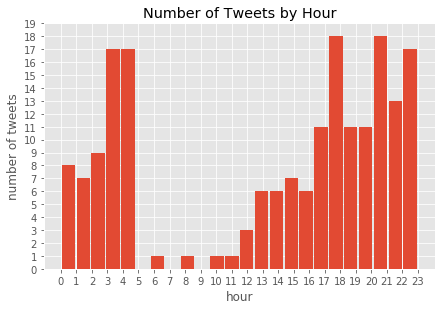

In [153]:
yticks=pd.Series(range(0,20))
xticks=pd.Series(range(0,24))

plt.hist(df_corona.hour, bins=24, rwidth=0.9)
plt.yticks(ticks=yticks)
plt.xticks(ticks=xticks)
plt.tight_layout()
plt.title("Number of Tweets by Hour")
plt.xlabel("hour")
plt.ylabel("number of tweets")
plt.savefig("tweethist_hr.png", dpi=300, bbox_inches='tight')
plt.show()

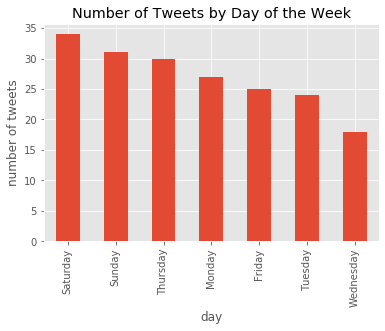

In [156]:
df_corona['day_of_week'].value_counts().plot(kind='bar')
plt.title("Number of Tweets by Day of the Week")
plt.xlabel("day")
plt.ylabel("number of tweets")
plt.savefig("tweethist_day.png", dpi=300, bbox_inches='tight')
plt.show()